In [32]:
import pandas as pd
from IPython.display import display

dataset = pd.read_csv(r"D:\Usep Syaikal Arifin\Computer Programming\Python\Kaggle\Customer Personality Analysis\Dataset\marketing_campaign.csv", sep="\t")

print("Shape of dataset = %d Baris & %d Kolom"%dataset.shape)
print("Informasi dataset : ")
display(dataset.info())
display(dataset.head())

Shape of dataset = 2240 Baris & 29 Kolom
Informasi dataset : 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 

None

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


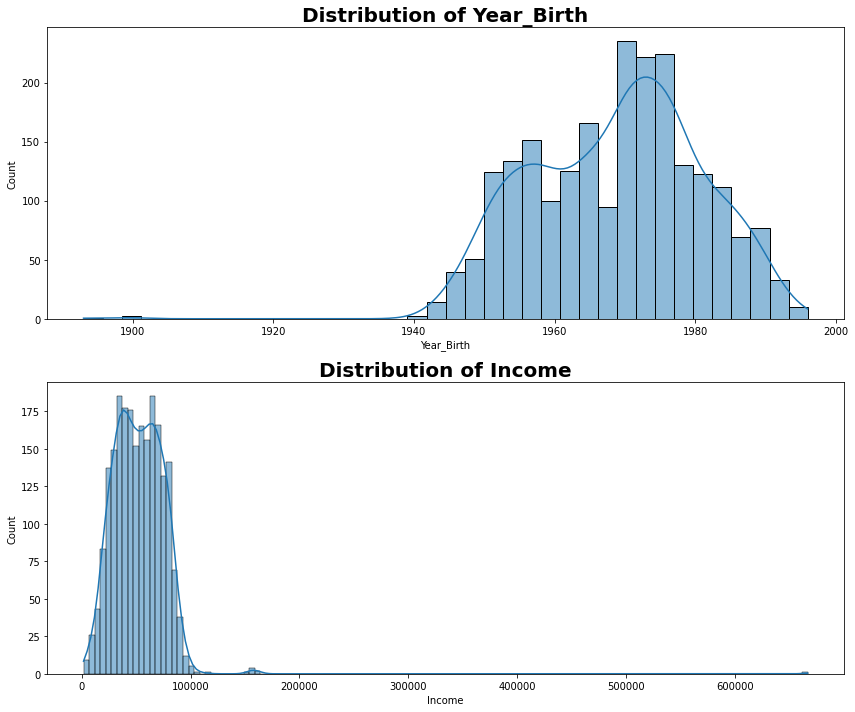

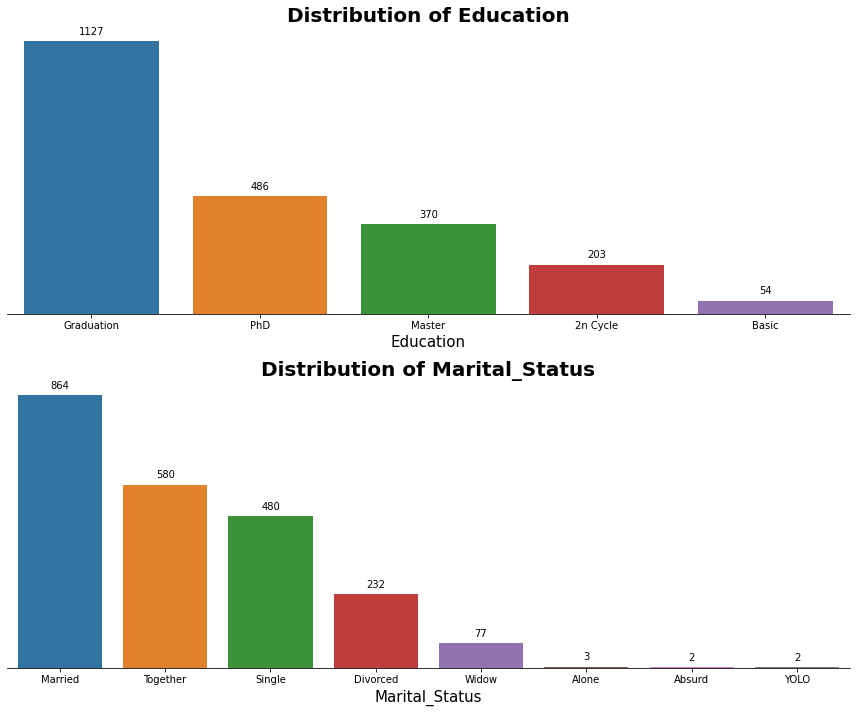

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

numerical_continue_column = ["Year_Birth", "Income"]
numerical_diskrit_column = ["Education","Marital_Status"]

fig, axs = plt.subplots(len(numerical_continue_column), 1, figsize=(12, 10))
for i, column in enumerate(numerical_continue_column):
    sns.histplot(data=dataset, x=column, kde=True, ax=axs[i])
    axs[i].set_title("Distribution of {}".format(column), fontsize=20, fontweight="bold")
plt.tight_layout()
plt.show()

fig, axs = plt.subplots(len(numerical_diskrit_column), 1, figsize=(12, 10))
for i, column in enumerate(numerical_diskrit_column):
    sns.countplot(data=dataset, x=column, order=dataset[column].value_counts().index, ax=axs[i])
    axs[i].set_title("Distribution of {}".format(column), fontsize=20, fontweight="bold")
    axs[i].set_xlabel(column, fontsize=15)
    for p in axs[i].patches:
        axs[i].annotate(
                        "{}".format(p.get_height()),
                        xy=(p.get_x() + p.get_width()/2, p.get_height()),
                        ha="center",
                        va="center",
                        xytext=(0, 10),
                        textcoords="offset points"
                       )
    sns.despine(left=True, top=True, right=True)
    axs[i].axes.yaxis.set_visible(False)
plt.tight_layout()
plt.show()

In [34]:
from datetime import date

hari_ini = date.today()
waktu_daftar = pd.to_datetime(dataset["Dt_Customer"])
waktu_daftar = (pd.to_numeric(waktu_daftar.dt.date.apply(lambda x: (hari_ini - x)).dt.days, downcast="integer")/365.25).round(0)
# senioritas = waktu_daftar - hari_ini
display(waktu_daftar.head())
display(hari_ini)

0    10.0
1     7.0
2     8.0
3     7.0
4     8.0
Name: Dt_Customer, dtype: float64

datetime.date(2021, 12, 7)

In [35]:
dataset = pd.read_csv(r"D:\Usep Syaikal Arifin\Computer Programming\Python\Kaggle\Customer Personality Analysis\Dataset\marketing_campaign.csv", sep="\t")

## Data Pre-Processing
age = 2022 - dataset["Year_Birth"]

belanja = 0
kolom_data_belanja = []
for column in dataset.columns:
    if column.startswith("Mnt"):
        kolom_data_belanja.append(column)
        belanja += dataset[column]

anak = dataset["Kidhome"] + dataset["Teenhome"]

pendidikan = dataset["Education"].replace({
                                            "2n Cycle" : "Undergraduate",
                                            "Basic" : "Undergraduate",
                                            "Graduation" : "Undergraduate",
                                            "Master" : "PostGraduate",
                                            "PhD" : "PostGraduate"
                                         })

status_pernikahan = dataset["Marital_Status"].replace({
                                                        "Married" : "Menikah",
                                                        "Together" : "Menikah",
                                                        "Single" : "Sendiri",
                                                        "Divorced" : "Sendiri",
                                                        "Widow" : "Sendiri",
                                                        "Alone" : "Sendiri",
                                                        "Absurd" : "Sendiri",
                                                        "YOLO" : "Sendiri"
                                                     })

penghasilan = dataset["Income"]

senioritas = waktu_daftar

new_dataset = pd.DataFrame({
                            "usia" : age,
                            "pendidikan" : pendidikan,
                            "status pernikahan" : status_pernikahan, 
                            "anak" : anak,
                            "penghasilan" : penghasilan,
                            "senioritas" : waktu_daftar,
                            "belanja" : belanja
                           })
                
display(new_dataset.head())

,usia,pendidikan,status pernikahan,anak,penghasilan,senioritas,belanja
0,65,Undergraduate,Sendiri,0,58138.0,10.0,1617
1,68,Undergraduate,Sendiri,2,46344.0,7.0,27
2,57,Undergraduate,Menikah,0,71613.0,8.0,776
3,38,Undergraduate,Menikah,1,26646.0,7.0,53
4,41,PostGraduate,Menikah,1,58293.0,8.0,422


In [36]:
dataframe = new_dataset.copy()

print("Shape of dataframe = %d Baris & %d Kolom"%dataframe.shape)
print("Informasi dataframe : ")
display(dataframe.info())
print("Statistik Dasar dataframe : ")
display(dataframe.describe())

Shape of dataframe = 2240 Baris & 7 Kolom
Informasi dataframe : 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   usia               2240 non-null   int64  
 1   pendidikan         2240 non-null   object 
 2   status pernikahan  2240 non-null   object 
 3   anak               2240 non-null   int64  
 4   penghasilan        2216 non-null   float64
 5   senioritas         2240 non-null   float64
 6   belanja            2240 non-null   int64  
dtypes: float64(2), int64(3), object(2)
memory usage: 122.6+ KB


None

Statistik Dasar dataframe : 


,usia,anak,penghasilan,senioritas,belanja
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000
mean,53.194196,0.950446,52247.251354,8.413839,605.798214
std,11.984069,0.751803,25173.076661,0.683295,602.249288
min,26.000000,0.000000,1730.000000,7.000000,5.000000
25%,45.000000,0.000000,35303.000000,8.000000,68.750000
50%,52.000000,1.000000,51381.500000,8.000000,396.000000
75%,63.000000,1.000000,68522.000000,9.000000,1045.500000
max,129.000000,3.000000,666666.000000,10.000000,2525.000000


In [37]:
dataframe = dataframe.dropna(subset=["penghasilan"])
print("Informasi dataframe : ")
display(dataframe.info())
print("Statistik Dasar dataframe : ")
display(dataframe.describe())

Informasi dataframe : 
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2216 entries, 0 to 2239
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   usia               2216 non-null   int64  
 1   pendidikan         2216 non-null   object 
 2   status pernikahan  2216 non-null   object 
 3   anak               2216 non-null   int64  
 4   penghasilan        2216 non-null   float64
 5   senioritas         2216 non-null   float64
 6   belanja            2216 non-null   int64  
dtypes: float64(2), int64(3), object(2)
memory usage: 138.5+ KB


None

Statistik Dasar dataframe : 


,usia,anak,penghasilan,senioritas,belanja
count,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000
mean,53.179603,0.947202,52247.251354,8.413357,607.075361
std,11.985554,0.749062,25173.076661,0.683691,602.900476
min,26.000000,0.000000,1730.000000,7.000000,5.000000
25%,45.000000,0.000000,35303.000000,8.000000,69.000000
50%,52.000000,1.000000,51381.500000,8.000000,396.500000
75%,63.000000,1.000000,68522.000000,9.000000,1048.000000
max,129.000000,3.000000,666666.000000,10.000000,2525.000000


In [38]:
dataframe["penghasilan"] = dataframe["penghasilan"].astype("int64")
dataframe["senioritas"] = dataframe["senioritas"].astype("int64")
display(dataframe.head())
display(dataframe.info())

,usia,pendidikan,status pernikahan,anak,penghasilan,senioritas,belanja
0,65,Undergraduate,Sendiri,0,58138,10,1617
1,68,Undergraduate,Sendiri,2,46344,7,27
2,57,Undergraduate,Menikah,0,71613,8,776
3,38,Undergraduate,Menikah,1,26646,7,53
4,41,PostGraduate,Menikah,1,58293,8,422


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2216 entries, 0 to 2239
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   usia               2216 non-null   int64 
 1   pendidikan         2216 non-null   object
 2   status pernikahan  2216 non-null   object
 3   anak               2216 non-null   int64 
 4   penghasilan        2216 non-null   int64 
 5   senioritas         2216 non-null   int64 
 6   belanja            2216 non-null   int64 
dtypes: int64(5), object(2)
memory usage: 138.5+ KB


None

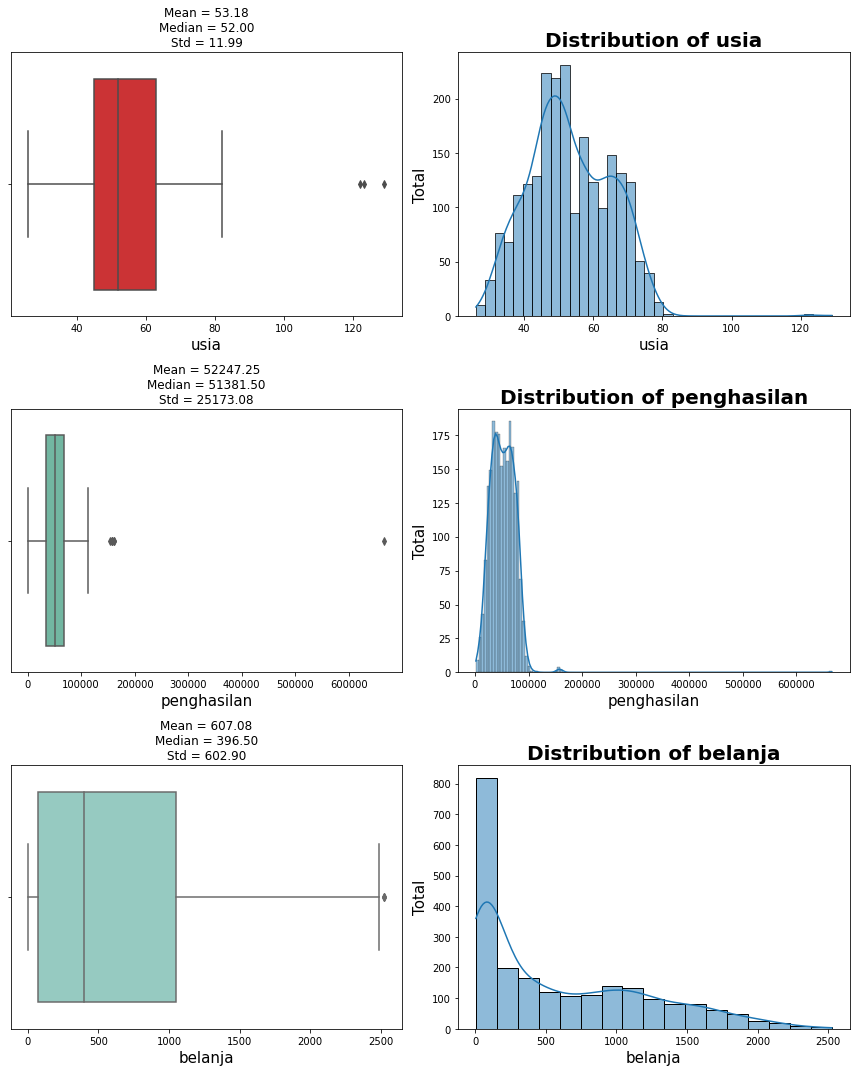

In [39]:
numerical_continue_columns = ["usia", "penghasilan", "belanja"]

fig, axs = plt.subplots(len(numerical_continue_columns), 2, figsize=(12, 15))
for i, column in enumerate(numerical_continue_columns):
    color = sns.color_palette("Set{}".format(i+1))
    sns.boxplot(data=dataframe, x=column, ax=axs[i][0], palette=color)
    axs[i][0].set_title("Mean = %.2f\nMedian = %.2f\nStd = %.2f"%(dataframe[column].mean(), dataframe[column].median(), dataframe[column].std()))
    axs[i][0].set_xlabel(column, fontsize=15)
    sns.histplot(data=dataframe, x=column, kde=True, ax=axs[i][1], palette=color)
    axs[i][1].set_title("Distribution of {}".format(column), fontsize=20, fontweight="bold")
    axs[i][1].set_xlabel(column, fontsize=15)
    axs[i][1].set_ylabel("Total", fontsize=15)
plt.tight_layout()
plt.show()

In [40]:
Q1 = dataframe[numerical_continue_columns].quantile(0.25)
Q3 = dataframe[numerical_continue_columns].quantile(0.75)
IQR = Q3 - Q1

batas_min = (Q1 - 1.5 * IQR)
batas_max = (Q3 + 1.5 * IQR)

dataframe= dataframe[~((dataframe[numerical_continue_columns] < batas_min) | (dataframe[numerical_continue_columns] > batas_max)).any(axis=1)]
display(dataframe)
lock_df = dataframe.copy()

,usia,pendidikan,status pernikahan,anak,penghasilan,senioritas,belanja
0,65,Undergraduate,Sendiri,0,58138,10,1617
1,68,Undergraduate,Sendiri,2,46344,7,27
2,57,Undergraduate,Menikah,0,71613,8,776
3,38,Undergraduate,Menikah,1,26646,7,53
4,41,PostGraduate,Menikah,1,58293,8,422
...,...,...,...,...,...,...,...
2235,55,Undergraduate,Menikah,1,61223,8,1341
2236,76,PostGraduate,Menikah,3,64014,7,444
2237,41,Undergraduate,Sendiri,0,56981,8,1241
2238,66,PostGraduate,Menikah,1,69245,8,843


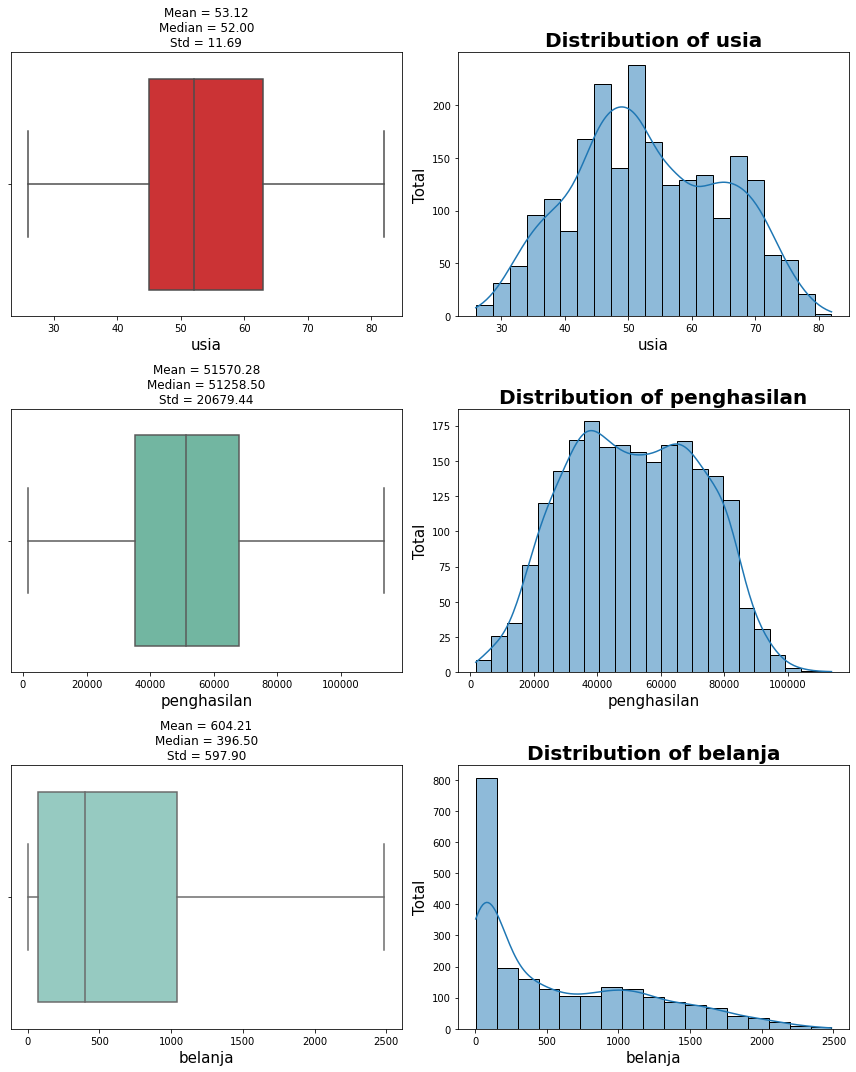

In [41]:
numerical_continue_columns = ["usia", "penghasilan", "belanja"]

fig, axs = plt.subplots(len(numerical_continue_columns), 2, figsize=(12, 15))
for i, column in enumerate(numerical_continue_columns):
    color = sns.color_palette("Set{}".format(i+1))
    sns.boxplot(data=dataframe, x=column, ax=axs[i][0], palette=color)
    axs[i][0].set_title("Mean = %.2f\nMedian = %.2f\nStd = %.2f"%(dataframe[column].mean(), dataframe[column].median(), dataframe[column].std()))
    axs[i][0].set_xlabel(column, fontsize=15)
    sns.histplot(data=dataframe, x=column, kde=True, ax=axs[i][1], palette=color)
    axs[i][1].set_title("Distribution of {}".format(column), fontsize=20, fontweight="bold")
    axs[i][1].set_xlabel(column, fontsize=15)
    axs[i][1].set_ylabel("Total", fontsize=15)
plt.tight_layout()
plt.show()

In [42]:
dataframe["senioritas"] = dataframe["senioritas"].replace({
                                                            7 : 0,
                                                            8 : 1,
                                                            9 : 2,
                                                            10 : 3
                                                         })

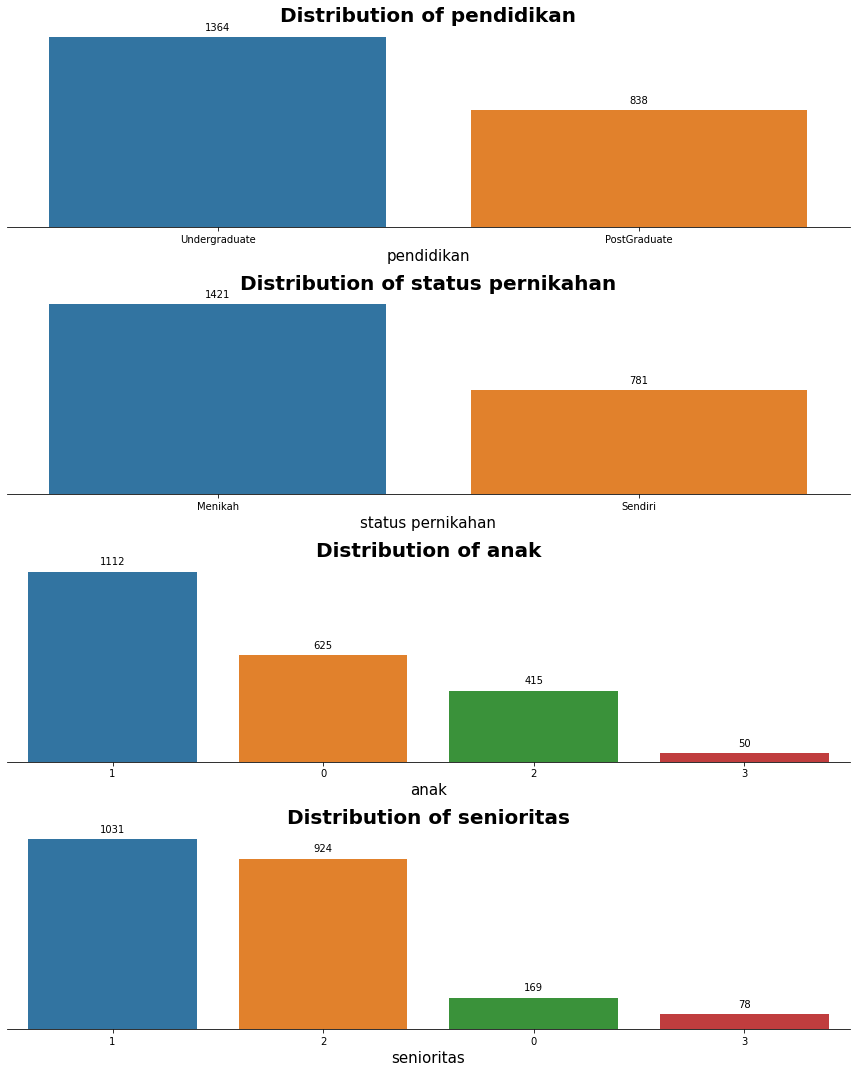

In [43]:
categorical_columns = []
for column in dataframe.columns:
    if column not in numerical_continue_columns:
        categorical_columns.append(column)

fig, axs = plt.subplots(len(categorical_columns), 1, figsize=(12, 15))
for i, column in enumerate(categorical_columns):
    sns.countplot(data=dataframe, x=column, order=dataframe[column].value_counts().index, ax=axs[i])
    axs[i].set_title("Distribution of {}".format(column), fontsize=20, fontweight="bold")
    axs[i].set_xlabel(column, fontsize=15)
    for p in axs[i].patches:
        axs[i].annotate(
                        "{}".format(p.get_height()),
                        xy=(p.get_x() + p.get_width()/2, p.get_height()),
                        ha="center",
                        va="center",
                        xytext=(0, 10),
                        textcoords="offset points"
                       )
    sns.despine(left=True, top=True, right=True)
    axs[i].axes.yaxis.set_visible(False)
plt.tight_layout()
plt.show()

In [44]:
print("Statistik dasar dataframe : ")
display(dataframe[numerical_continue_columns].describe().T[["min","max"]])

Statistik dasar dataframe : 


,min,max
usia,26.0,82.0
penghasilan,1730.0,113734.0
belanja,5.0,2486.0


In [45]:
from sklearn.preprocessing import StandardScaler

minmax_scaller = StandardScaler()
dataframe[numerical_continue_columns] = minmax_scaller.fit_transform(dataframe[numerical_continue_columns])

print("Statistik dasar dataframe : ")
display(dataframe[numerical_continue_columns].describe().T[["min","max"]])
display(dataframe.head())

Statistik dasar dataframe : 


,min,max
usia,-2.321294,2.471155
penghasilan,-2.410685,3.006747
belanja,-1.002414,3.148040


,usia,pendidikan,status pernikahan,anak,penghasilan,senioritas,belanja
0,1.016304,Undergraduate,Sendiri,0,0.317669,3,1.694294
1,1.273043,Undergraduate,Sendiri,2,-0.252786,0,-0.965610
2,0.331669,Undergraduate,Menikah,0,0.969430,1,0.287389
3,-1.294340,Undergraduate,Menikah,1,-1.205543,0,-0.922115
4,-1.037602,PostGraduate,Menikah,1,0.325166,1,-0.304816


In [46]:
from sklearn.preprocessing import LabelEncoder

encoder_columns = dataframe.columns[dataframe.dtypes == "object"].to_list()

for column in encoder_columns:
    LE = LabelEncoder()
    dataframe[column] = LE.fit_transform(dataframe[column])
    print(LE.classes_)
    print(sorted(dataframe[column].unique()))

['PostGraduate' 'Undergraduate']
[0, 1]
['Menikah' 'Sendiri']
[0, 1]


In [47]:
display(dataframe.head())

,usia,pendidikan,status pernikahan,anak,penghasilan,senioritas,belanja
0,1.016304,1,1,0,0.317669,3,1.694294
1,1.273043,1,1,2,-0.252786,0,-0.965610
2,0.331669,1,0,0,0.969430,1,0.287389
3,-1.294340,1,0,1,-1.205543,0,-0.922115
4,-1.037602,0,0,1,0.325166,1,-0.304816


In [48]:
integer_column = dataframe.columns[(dataframe.dtypes == "int32") | (dataframe.dtypes == "int64")].to_list()
float_column = dataframe.columns[dataframe.dtypes == "float64"].to_list()

dataset_columns = integer_column + float_column

display(integer_column)
display(float_column)
display(dataset_columns)

# for column in integer_column:
#     dataframe[column] = dataframe[column].astype("float64")

dataset_model = dataframe[dataset_columns]

display(dataset_model.head())

['pendidikan', 'status pernikahan', 'anak', 'senioritas']

['usia', 'penghasilan', 'belanja']

['pendidikan',
 'status pernikahan',
 'anak',
 'senioritas',
 'usia',
 'penghasilan',
 'belanja']

,pendidikan,status pernikahan,anak,senioritas,usia,penghasilan,belanja
0,1,1,0,3,1.016304,0.317669,1.694294
1,1,1,2,0,1.273043,-0.252786,-0.965610
2,1,0,0,1,0.331669,0.969430,0.287389
3,1,0,1,0,-1.294340,-1.205543,-0.922115
4,0,0,1,1,-1.037602,0.325166,-0.304816


In [49]:
display(dataset_model.dtypes)

pendidikan             int32
status pernikahan      int32
anak                   int64
senioritas             int64
usia                 float64
penghasilan          float64
belanja              float64
dtype: object

In [50]:
from kmodes.kmodes import KModes
from kmodes.kprototypes import KPrototypes

# cost = {}
# for k in range(2, 20):
#     kproto = KPrototypes(n_clusters=k, random_state=42)
#     kproto.fit_predict(dataset_model, categorical=[0, 1, 2, 3])
#     cost[k] = kproto.cost_

kproto = KPrototypes(n_clusters=5, random_state=0)
kproto = kproto.fit(dataset_model, categorical=[0, 1, 2, 3])

In [51]:
clusters = kproto.predict(dataset_model, categorical=[0, 1, 2, 3])
display(clusters)

array([0, 1, 3, ..., 4, 0, 1], dtype=uint16)

In [52]:
dataset_model["cluster"] = clusters


C:\Users\MYHOME~1\AppData\Local\Temp/ipykernel_12320/2445393621.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_model["cluster"] = clusters


In [53]:
display(dataset_model.head())

,pendidikan,status pernikahan,anak,senioritas,usia,penghasilan,belanja,cluster
0,1,1,0,3,1.016304,0.317669,1.694294,0
1,1,1,2,0,1.273043,-0.252786,-0.965610,1
2,1,0,0,1,0.331669,0.969430,0.287389,3
3,1,0,1,0,-1.294340,-1.205543,-0.922115,2
4,0,0,1,1,-1.037602,0.325166,-0.304816,3


In [55]:
lock_df["cluster"] = clusters
display(lock_df.head())

,usia,pendidikan,status pernikahan,anak,penghasilan,senioritas,belanja,cluster
0,65,Undergraduate,Sendiri,0,58138,10,1617,0
1,68,Undergraduate,Sendiri,2,46344,7,27,1
2,57,Undergraduate,Menikah,0,71613,8,776,3
3,38,Undergraduate,Menikah,1,26646,7,53,2
4,41,PostGraduate,Menikah,1,58293,8,422,3


In [57]:
display(float_column)

['usia', 'penghasilan', 'belanja']

IndexError: index 2 is out of bounds for axis 0 with size 2

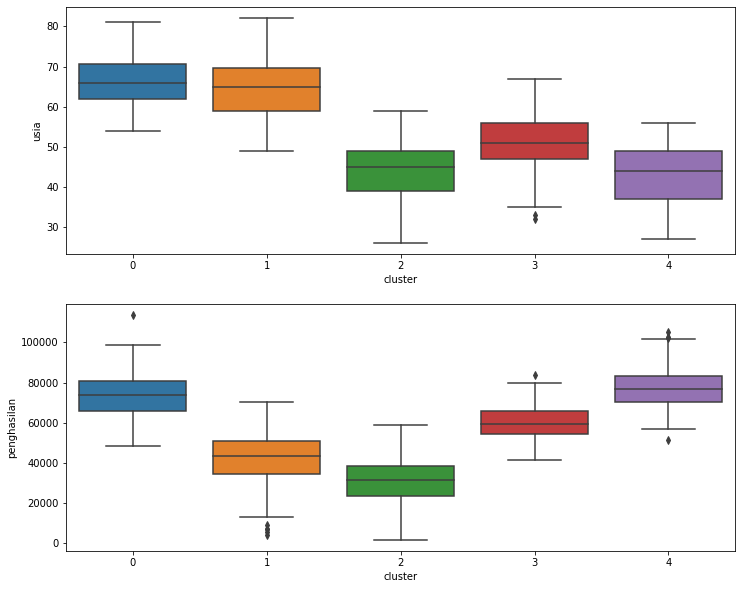

In [59]:
fig, axs = plt.subplots(2, 1, figsize=(12, 10))
for i, column in enumerate(float_column):
    sns.boxplot(data=lock_df, x="cluster", y=column, ax=axs[i])
plt.tight_layout()
plt.show()